In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [55]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Null Values in Train data
Age         177
Cabin       687
Embarked      2
dtype: int64


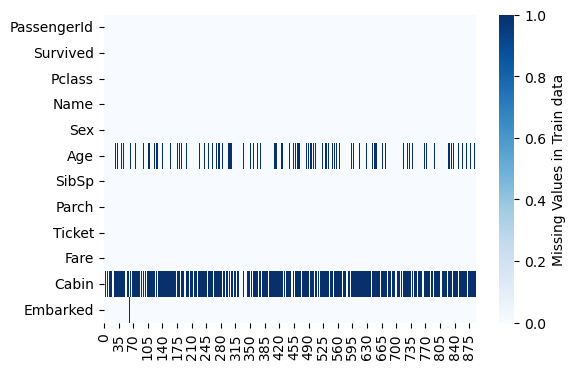

In [58]:
print("Null Values in Train data")
df_null  = df.isnull().sum()
print(df_null[df_null>0])

plt.figure(figsize=(6, 4))
sns.heatmap(df.isna().transpose(), cmap="Blues", cbar_kws={'label': 'Missing Values in Train data'})
plt.show()

In [59]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


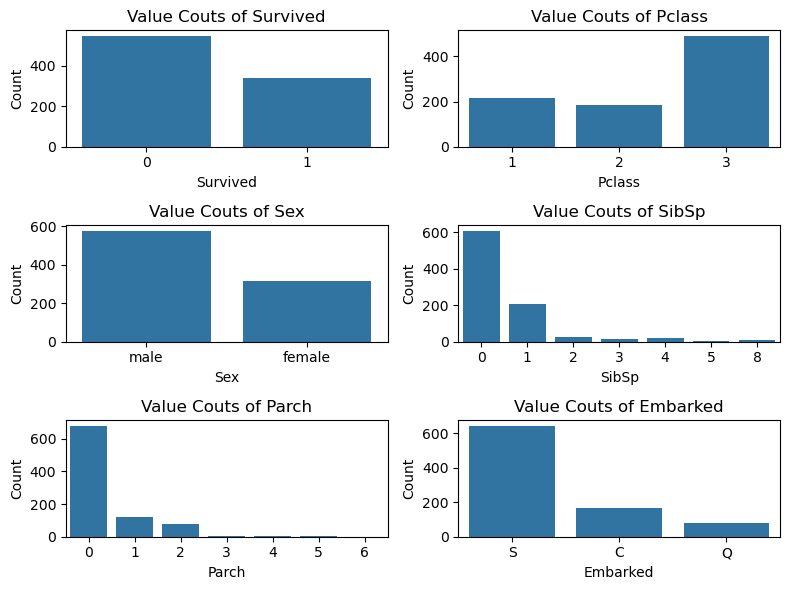

In [60]:
traindf_pl = [df['Survived'], df['Pclass'], df['Sex'], df['SibSp'], df['Parch'], df['Embarked']]
plot_names = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 6))
for i, ax in enumerate(axes.flatten()):
    sns.countplot(x=traindf_pl[i], ax=ax)
    ax.set_title(f'Value Couts of {plot_names[i]}')
    ax.set_xlabel(plot_names[i])
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

C:\Users\varal\AppData\Local\Temp\ipykernel_8664\493471833.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Survived', y='Age', data=df.dropna(), palette="mako", split=True)


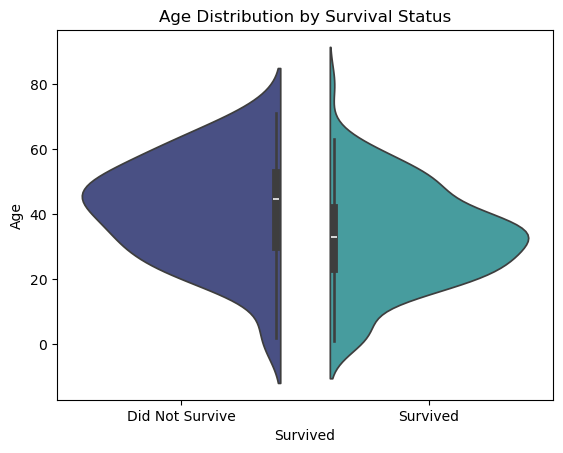

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing 'Survived' and 'Age' columns
sns.violinplot(x='Survived', y='Age', data=df.dropna(), palette="mako", split=True)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.show()


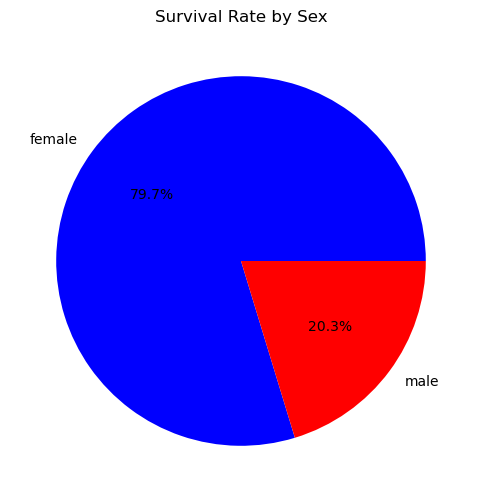

In [62]:
survived_sex = df.groupby(['Sex'])['Survived'].mean()
plt.figure(figsize=(8, 6))
plt.pie(survived_sex, labels=survived_sex.index, autopct='%1.1f%%', colors=['blue', 'red'])
plt.title('Survival Rate by Sex')
plt.show()

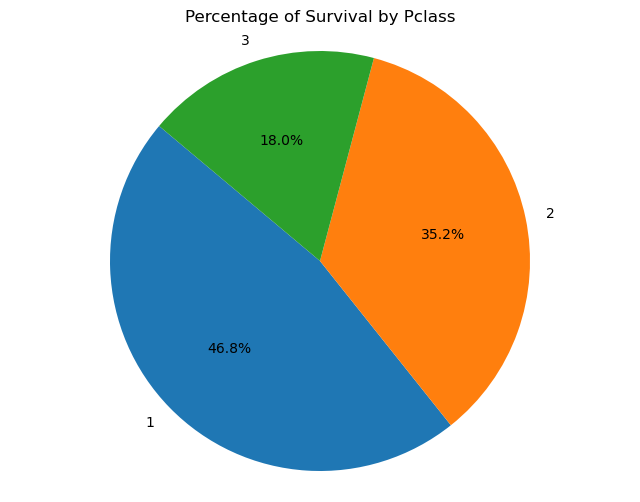

In [63]:
survived_percentage = df.groupby('Pclass')['Survived'].mean() * 100
plt.figure(figsize=(8, 6))
plt.pie(survived_percentage, labels=survived_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Survival by Pclass')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [64]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [65]:
# FEATURES WE WANT TO USE
features = ['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'] 
## Name and Ticket are not a predictor and Cabin has almost 85% missing values

In [66]:
# ORGANIZE FEATURES INTO NUMERICAL OR CATEGORICAL
# Numerical features are stored in num_features, categorical features are stored in cat_features
num_features, cat_features = [], []

# Identify numerical and categorical features based on dtype
# 'object' dtype indicates categorical data, while 'int' and 'float' indicate numerical data
for i in features:
    if df[i].dtype == 'object':
        cat_features.append(i)
#     elif i == 'Pclass':
#         continue
    else:
        num_features.append(i)

num_features, cat_features

(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], ['Sex', 'Embarked'])

In [67]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

In [68]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Survived'], test_size=0.15, random_state=42, shuffle=True)
X_train.shape, X_test.shape

((757, 7), (134, 7))

In [69]:
# Create pipeline for numerical features
num_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', MinMaxScaler())  # Scale features to a specified range
])

# Create pipeline for categorical features
cat_transformer = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('encoder', OneHotEncoder(handle_unknown='error', drop='first'))  # Encode categorical features using one-hot encoding
])

In [70]:
# ColumnTransformer to preprocess numerical and categorical features
preprocess = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),  # Apply num_transformer to numerical features
    ('cat', cat_transformer, cat_features)   # Apply cat_transformer to categorical features
])

In [71]:
from sklearn.svm import SVC

svc_model=Pipeline(steps=[
    ('preprocess',preprocess),
    ('model',SVC(random_state=42,class_weight='balanced'))
])
svc_model.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Sex', 'Embarked'])])),
                ('model', SVC(class_weight='balanced', random_state=42))])

In [72]:
print(classification_report(svc_model.predict(X_train),y_train))
print(classification_report(svc_model.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       491
           1       0.70      0.75      0.72       266

    accuracy                           0.80       757
   macro avg       0.78      0.79      0.78       757
weighted avg       0.80      0.80      0.80       757

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        81
           1       0.73      0.77      0.75        53

    accuracy                           0.80       134
   macro avg       0.79      0.79      0.79       134
weighted avg       0.80      0.80      0.80       134



In [73]:
from sklearn.tree import DecisionTreeClassifier

dt_model=Pipeline(steps=[
    ('preprocess',preprocess),
    ('model',DecisionTreeClassifier(random_state=42,class_weight='balanced'))
])

dt_model.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Sex', 'Embarked'])])),
                ('model',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=42))])

In [74]:
print(classification_report(dt_model.predict(X_train),y_train))
print(classification_report(dt_model.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       464
           1       0.99      0.96      0.97       293

    accuracy                           0.98       757
   macro avg       0.98      0.98      0.98       757
weighted avg       0.98      0.98      0.98       757

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        73
           1       0.82      0.75      0.79        61

    accuracy                           0.81       134
   macro avg       0.81      0.81      0.81       134
weighted avg       0.81      0.81      0.81       134



In [75]:
from sklearn.ensemble import RandomForestClassifier

rf_model=Pipeline(steps=[
    ('preprocess',preprocess),
    ('model',RandomForestClassifier(random_state=42,class_weight='balanced'))
])

rf_model.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Sex', 'Embarked'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [76]:
print(classification_report(rf_model.predict(X_train),y_train))
print(classification_report(rf_model.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       470
           1       0.98      0.97      0.97       287

    accuracy                           0.98       757
   macro avg       0.98      0.98      0.98       757
weighted avg       0.98      0.98      0.98       757

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        82
           1       0.77      0.83      0.80        52

    accuracy                           0.84       134
   macro avg       0.83      0.83      0.83       134
weighted avg       0.84      0.84      0.84       134



In [77]:
test_df=pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [78]:
# Predict using random forest model
test_preds1 = rf_model.predict(test_df[features])

# Predict using decision tree model
test_preds2 = dt_model.predict(test_df[features])

# Predict using SVC model (Support Vector Classifier)
test_preds3 = svc_model.predict(test_df[features])

In [79]:
sum(test_preds1==test_preds2),sum(test_preds2==test_preds3), sum(test_preds1==test_preds3), len(test_df)

(374, 324, 342, 418)

In [80]:
ans_df=pd.DataFrame({'PassengerId':test_df['PassengerId'], 'Survived':test_preds1})
ans_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [81]:
ans_df.to_csv('ans.csv',index=False)